In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [6]:
rng = np.random.default_rng(seed=42)

#  Initiate a rangom 10 x 2 array:
X = rng.random((10,2))

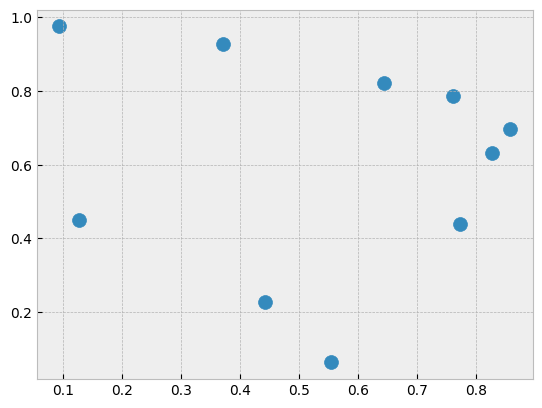

In [18]:
#  quick plot of the random points 
plt.style.use('bmh')
plt.scatter(X[:, 0],X[:, 1], s=100)

In [ ]:
#  computes the sum of squared distance between each pair
#  this is the sum of sqaured differences in each dimension
dist_eq = np.sum((X[:, np.newaxis] - X[np.newaxis, :]) ** 2, axis=-1)